In [1]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
# Generate dataset(data points,variables,clusters,seed,std)
X, y = make_blobs(n_samples=10, n_features=2, centers=5, random_state=42, cluster_std=1.0)

In [3]:
X

array([[ 4.88184111,  0.05988944],
       [-7.78765127, -8.29241329],
       [ 0.87130666,  4.53714957],
       [-7.89245831, -6.56586226],
       [ 1.47791751,  4.27237415],
       [-8.77079955,  5.89877473],
       [-2.97867201,  9.55684617],
       [ 2.914961  ,  1.41088215],
       [-2.97261532,  8.54855637],
       [-7.37267899,  7.09774662]])

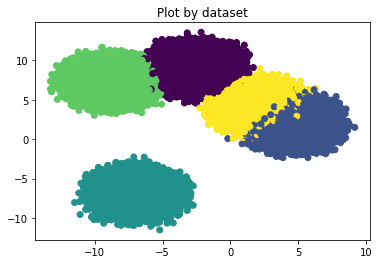

In [55]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Plot by dataset')
plt.show()


In [56]:
class K_Means:
    
    # initializam algoritmul
    def __init__(self, k=2, tol=0.001, max_iter=800):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

        # amtrenez algoritmul 
    def fit(self,data):

        self.centroids_ = {0: [-6.88397533693082, -6.881152237145192],
 1: [-2.507390888195659, 9.012348535834398],
 2: [4.666490257528011, 1.9482277745687282],
 3: [-8.841685411707159, 7.3227460048848725],
 4: [1.9956809274535505, 4.185773373141004]}   

        

        for i in range(self.max_iter): # iteram prin numarul de iteratii
            self.classifications = {}  # Facem un dictionar pentru a stoca liste cu puncte pentru fiecare cluster
#3
            for i in range(self.k):  # # iterez prin numarul de clastere
                self.classifications[i] = []  # pentru fiecare cluster in dictionarul clasification se creaza lista goala

            #Calculam distanta de la un punct din cluster pina la fiecare centroid
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids_[centroid]) for centroid in self.centroids_]
                #print(distances)
                classification = distances.index(min(distances)) # clusteru pina la care distanta e minima
                self.classifications[classification].append(featureset) # adaugam punctul in lista al clusterul cel mai apropiat

            prev_centroids = dict(self.centroids_) # creem o copie a centroizilor
                
            # calculez average pentru fiecare cluster
            # facem o medie din punctile cele mai apropiate si le schimbam cu  coordonate noi ale centroizilor
            for classification in self.classifications:
                self.centroids_[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids_: # iteram prin lista noua a centroizilor 
                original_centroid = prev_centroids[c] # centroidul precedent
                current_centroid = self.centroids_[c] # centroidul calculat pe baza de medie clusterului 
                # Aflam distanta dintre curent si nou
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            # daca distanta e mai mica ca toleranta atunci se opreste          
            if optimized:
                break
                
#             print(self.centroids_)            
#pentru fiecare punct din dataset aflam distanta pina la centroid
#aflam distanta minima dintre acestea
# clusterul cu distanta minima este noul cluster al punctului dat
# adaug clasterul la prediction
#returnam lista de predictii
    def predict(self,data):
        prediction = []
        for i in range(len(data)):
            distances = [np.linalg.norm(data[i]-self.centroids_[centroid]) for centroid in self.centroids_]
            classification = distances.index(min(distances))
            prediction.append(classification)
        return prediction

In [57]:
%%time
Kmean = K_Means(5)
Kmean.fit(X)
y = Kmean.predict(X)


CPU times: user 1min 44s, sys: 1.63 s, total: 1min 45s
Wall time: 1min 45s


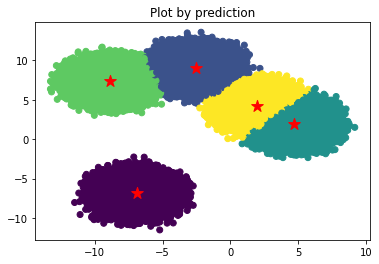

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y)
for centroid in Kmean.centroids_:
    plt.scatter(Kmean.centroids_[centroid][0], Kmean.centroids_[centroid][1],
                marker="*", color="red", s=150)
plt.title('Plot by prediction')
plt.show()